# Load data from XY file exported from SpecsLab Prodigy

### Modules needed for load XY files and ploting the data

In [1]:
# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- Our own modules ---------------------------------------------------------
import sys

# permatent location of functions from pyFitXPS
sys.path.insert(0, '/home/julio/Python/pyFitXPS/pyfitxps/') # Julio Laptop
#sys.path.insert(0, '/Users/ceciliapatrault/Desktop/Julio/XPS_PYTHON/paquetes_funciones') # Mac
import specs_xy as sp

search and listing the files in folder located realive to this notebook

In [2]:
folder_path = "data/separated/"

# the module specs_xy as sp have the function "list_files_xy()"
files = sp.list_files_xy(folder_path)

print(files)

data/separated/
['data/separated/Au_MeMBA_5min_27_C (3).xy', 'data/separated/Au_MeMBA_5min_20_O (1).xy', 'data/separated/Au_MeMBA_5min_23_Au (2).xy', 'data/separated/Au_MeMBA_5min_16_S (1).xy', 'data/separated/Au_MeMBA_5min_15_O (0).xy', 'data/separated/Au_MeMBA_5min_24_VB (2).xy', 'data/separated/Au_MeMBA_5min_14_VB (0).xy', 'data/separated/Au_MeMBA_5min_10_Survey (0).xy', 'data/separated/Au_MeMBA_5min_19_VB (1).xy', 'data/separated/Au_MeMBA_5min_18_Au (1).xy', 'data/separated/Au_MeMBA_5min_21_S (2).xy', 'data/separated/Au_MeMBA_5min_17_C (1).xy', 'data/separated/Au_MeMBA_5min_30_O (3).xy', 'data/separated/Au_MeMBA_5min_25_O (2).xy', 'data/separated/Au_MeMBA_5min_28_Au (3).xy', 'data/separated/Au_MeMBA_5min_12_C (0).xy', 'data/separated/Au_MeMBA_5min_29_VB (3).xy', 'data/separated/Au_MeMBA_5min_11_S (0).xy', 'data/separated/Au_MeMBA_5min_13_Au (0).xy', 'data/separated/Au_MeMBA_5min_26_S (3).xy', 'data/separated/Au_MeMBA_5min_22_C (2).xy']


the module `specs_xy` have two functions to load files:
1) `load_one_file_xy()`. The data is loaded as **dictionary**
2) `load_all_xy_files_in()`. Read all .xy files in a folder, and store all data in one dictionary. Each element in that dictionary, is a dictiorary as loaded with the previous function. The full dictionary is ordered alfabetically.

In [3]:
sp.load_one_file_xy?

Signature: sp.load_one_file_xy(filename)
Docstring:
Read one .xy file and store info in a dictionary

Parameters
----------
filename : TYPE
    DESCRIPTION.

Returns
-------
dict with two elements: 'details' and 'data_orig':
    'details' is a dict wich store the info from adquisition parameters
    'data_orig' dict which contain tuples for orinigal data as two elements:
        keys:
            ['BE'] binding energy
            ['KE'] kinetic energy
            ['intensity'] intensity (counts or counst per second)

for example:
    dict['details']['Pass Energy'] give the pass energy of the adquisition
    dict['data_orig']['BE'] give the x-axis for binding energy
    dict['data_orig']['intensity'] give the y-axis for intensity
File:      ~/Python/pyFitXPS/pyfitxps/specs_xy.py
Type:      function


In [4]:
sp.load_all_file_xy_in?

Object `sp.load_all_file_xy_in` not found.


## Loading ONE .xy file
Example of use for `load_one_xy_file()` :

In [5]:
survey = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_10_Survey (0).xy')

then, the sructure of each spectrum is

In [6]:
type(survey)

dict

In [7]:
survey.keys()

dict_keys(['details', 'data_orig'])

In [8]:
survey['details'].keys()

dict_keys(['Region', 'Acquisition Date', 'Analysis Method', 'Analyzer Lens', 'Analyzer Slit', 'Scan Mode', 'Curves/Scan', 'Values/Curve', 'Dwell Time', 'Excitation Energy', 'Binding Energy', 'Pass Energy', 'Bias Voltage', 'Detector Voltage', 'Eff. Workfunction', 'Source', 'Comment', 'Number of Scans'])

In [9]:
survey['data_orig'].keys()

dict_keys(['BE', 'KE', 'intensity'])

In [10]:
type(survey['data_orig']['BE'])

numpy.ndarray

In [11]:
survey['data_orig']['BE']

array([-1.100e+03, -1.099e+03, -1.098e+03, ..., -0.000e+00,  1.000e+00,
        2.000e+00])

In [12]:
survey['data_orig']['intensity']

array([3.4533572e+04, 3.3984171e+04, 3.4245547e+04, ..., 2.6476600e+01,
       2.4925190e+01, 2.9589760e+01])

Then, one can plot the data as

Text(0, 0.5, 'Intensity [cps]')

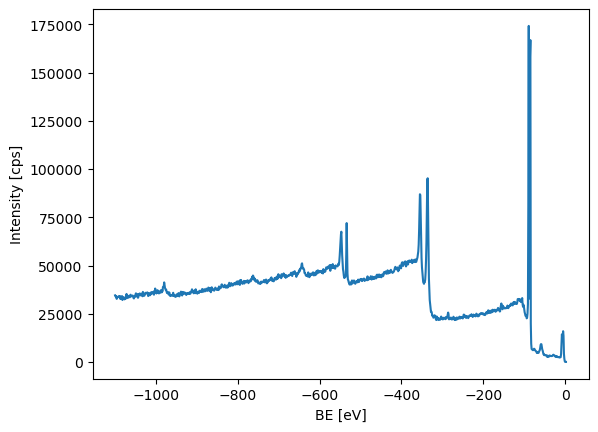

In [13]:
plt.plot(survey['data_orig']['BE'],survey['data_orig']['intensity'])
plt.xlabel('BE [eV]')
plt.ylabel('Intensity [cps]')

## Loading ALL .xy files
Example of use for `load_all_xy_files_in()`

In [14]:
# declaring the folder where all file are located

folder_path = "data/separated/"

# the module specs_xy as sp have the function "list_files_xy()"
files = sp.list_files_xy(folder_path)

print(files)

data/separated/
['data/separated/Au_MeMBA_5min_27_C (3).xy', 'data/separated/Au_MeMBA_5min_20_O (1).xy', 'data/separated/Au_MeMBA_5min_23_Au (2).xy', 'data/separated/Au_MeMBA_5min_16_S (1).xy', 'data/separated/Au_MeMBA_5min_15_O (0).xy', 'data/separated/Au_MeMBA_5min_24_VB (2).xy', 'data/separated/Au_MeMBA_5min_14_VB (0).xy', 'data/separated/Au_MeMBA_5min_10_Survey (0).xy', 'data/separated/Au_MeMBA_5min_19_VB (1).xy', 'data/separated/Au_MeMBA_5min_18_Au (1).xy', 'data/separated/Au_MeMBA_5min_21_S (2).xy', 'data/separated/Au_MeMBA_5min_17_C (1).xy', 'data/separated/Au_MeMBA_5min_30_O (3).xy', 'data/separated/Au_MeMBA_5min_25_O (2).xy', 'data/separated/Au_MeMBA_5min_28_Au (3).xy', 'data/separated/Au_MeMBA_5min_12_C (0).xy', 'data/separated/Au_MeMBA_5min_29_VB (3).xy', 'data/separated/Au_MeMBA_5min_11_S (0).xy', 'data/separated/Au_MeMBA_5min_13_Au (0).xy', 'data/separated/Au_MeMBA_5min_26_S (3).xy', 'data/separated/Au_MeMBA_5min_22_C (2).xy']


In [16]:
# The name of sample or experiment is "Au_MeMBA_5min", 
# and every spectra (.xy file) have the same initial name. Then, for practicity
# we declare the name of the variable wich will contain the full dictionary

Au_MeMBA_5min = sp.load_all_files_xy_in(folder_path)


Then, we can see what elements are contained in the dictionary

In [17]:
Au_MeMBA_5min.keys()

odict_keys(['Au (0)', 'Au (1)', 'Au (2)', 'Au (3)', 'C (0)', 'C (1)', 'C (2)', 'C (3)', 'O (0)', 'O (1)', 'O (2)', 'O_3', 'S (0)', 'S (1)', 'S (2)', 'S (3)', 'Survey (0)', 'VB (0)', 'VB (1)', 'VB (2)', 'VB (3)'])

every element are a dictionary with all data of each spectra:

In [18]:
Au_MeMBA_5min['Au (0)'].keys()

dict_keys(['details', 'data_orig'])

In [19]:
Au_MeMBA_5min['Au (0)']

{'details': {'Region': 'Au (0)',
  'Acquisition Date': '06/10/22 18:25:39 UTC',
  'Analysis Method': 'XPS',
  'Analyzer Lens': 'MediumArea:3.5kV',
  'Analyzer Slit': '5:7x20\\B:open',
  'Scan Mode': 'FixedAnalyzerTransmission',
  'Curves/Scan': 1,
  'Values/Curve': 281,
  'Dwell Time': 0.1,
  'Excitation Energy': 1486.71,
  'Binding Energy': 94.0,
  'Pass Energy': 20.0,
  'Bias Voltage': 90.0,
  'Detector Voltage': 1750.0,
  'Eff. Workfunction': 4.341,
  'Source': 'Focus',
  'Comment': 'sin irradiar',
  'Number of Scans': 5},
 'data_orig': {'BE': array([-94.  , -93.95, -93.9 , -93.85, -93.8 , -93.75, -93.7 , -93.65,
         -93.6 , -93.55, -93.5 , -93.45, -93.4 , -93.35, -93.3 , -93.25,
         -93.2 , -93.15, -93.1 , -93.05, -93.  , -92.95, -92.9 , -92.85,
         -92.8 , -92.75, -92.7 , -92.65, -92.6 , -92.55, -92.5 , -92.45,
         -92.4 , -92.35, -92.3 , -92.25, -92.2 , -92.15, -92.1 , -92.05,
         -92.  , -91.95, -91.9 , -91.85, -91.8 , -91.75, -91.7 , -91.65,
         -9

Text(0, 0.5, 'Intensity [cps]')

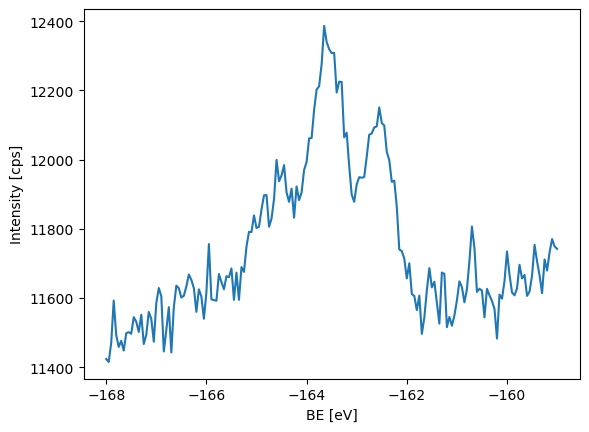

In [21]:
region = Au_MeMBA_5min['S (0)'] # <-- just changing the key, is easy to 
                                # see every data

plt.plot(region['data_orig']['BE'],region['data_orig']['intensity'])
plt.xlabel('BE [eV]')
plt.ylabel('Intensity [cps]')